In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()

# Метод опорных векторов

Метод опорных векторов (support vector machines, SVMs) — очень мощный
и гибкий класс алгоритмов обучения с учителем как для классификации, так
и регрессии.

Разделяющая классификация (discriminative classification): вместо моделирования каждого из классов найдем прямую или кривую (в двумерном пространстве) или многообразие (в многомерном пространстве), отделяющее классы друг от друга.

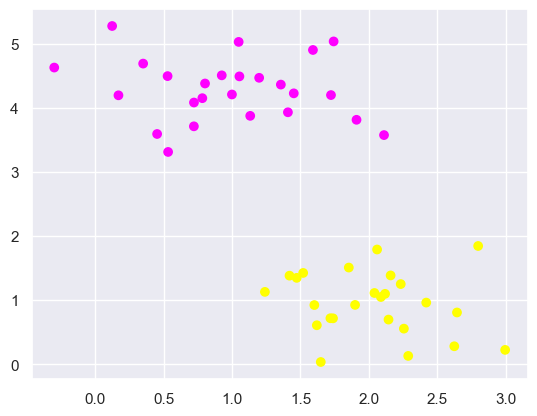

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')

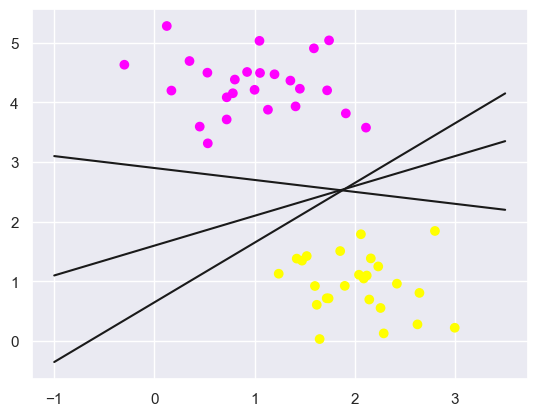

In [3]:
# три идеальных линейных разделяющих классификатора
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')
plt.plot(xfit, 1 * xfit + 0.65, '-k')
plt.plot(xfit, 0.5 * xfit + 1.6, '-k')
plt.plot(xfit, -0.2 * xfit + 2.9, '-k')

SVM заключается в следующем: вместо того чтобы рисовать между классами прямую
нулевой ширины, можно нарисовать около каждой из прямых отступ (margin)
некоторой ширины, простирающийся до ближайшей точки.

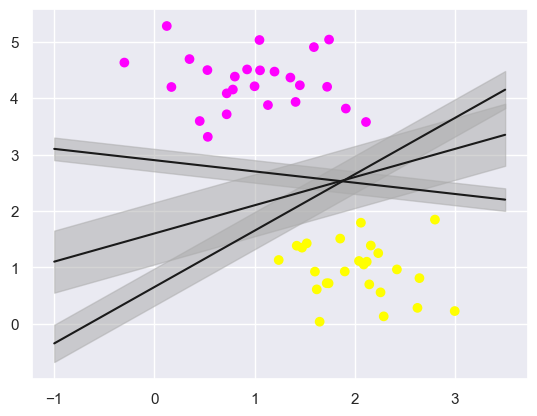

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')
lines = [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]
for m, b, d in lines:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, alpha=0.5, edgecolor=None, color='#AAAAAA')

Метод опорных векторов — пример оценивателя
с максимальным отступом (maximum margin estimator).

In [5]:
# классификатор на основе SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Строим график решающей функции для двумерной SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Создаем координатную сетку для оценки модели
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Рисуем границы принятия решений и отступы
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # Рисуем опорные векторы
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

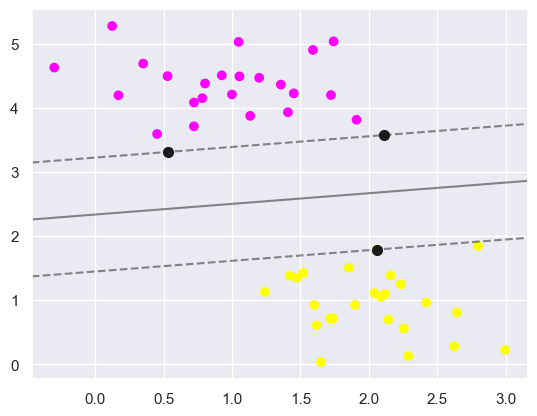

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')
plot_svc_decision_function(model)
for x1, y1 in model.support_vectors_:
    plt.plot(x1, y1, 'o', c='k', ms=7)

Обучение классификатора на основе метода опорных векторов. На рисунке показаны
границы отступов (штриховые линии) и опорные векторы (окружности).

Некоторые из обучающих точек лишь касаются отступа - черные точки на графике. Эти точки — ключевые элементы аппроксимации, они известны под названием опорных векторов (support vectors).

In [8]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [2.06051753, 1.79059891]])

### SVM-ядро

Возможности метода SVM особенно расширяются при его комбинации с ядрами
(kernels).

Чтобы применить алгоритм SVM с использованием
ядерного преобразования, достаточно просто заменить линейное ядро на ядро RBF
(radial basis function — «радиальная базисная функция») с помощью гиперпараметра модели kernel

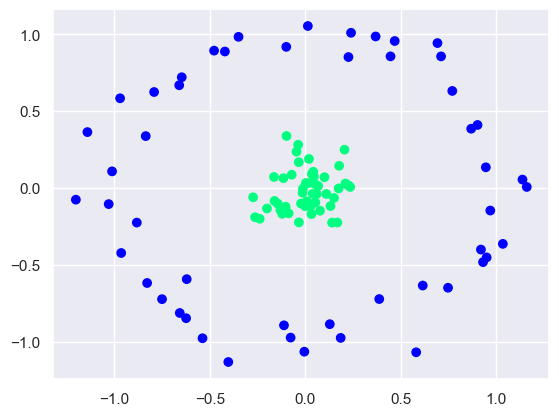

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

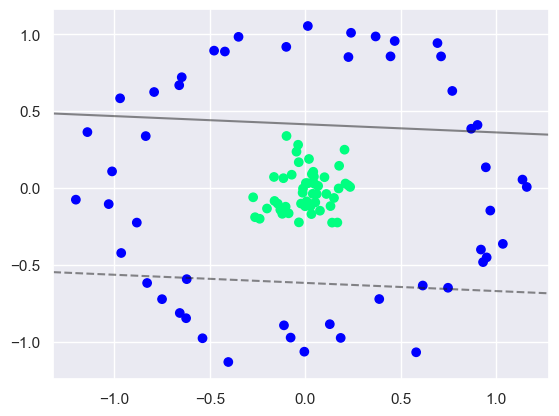

In [10]:
# линейный классификатор (неэффективный в данном случае)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plot_svc_decision_function(clf)

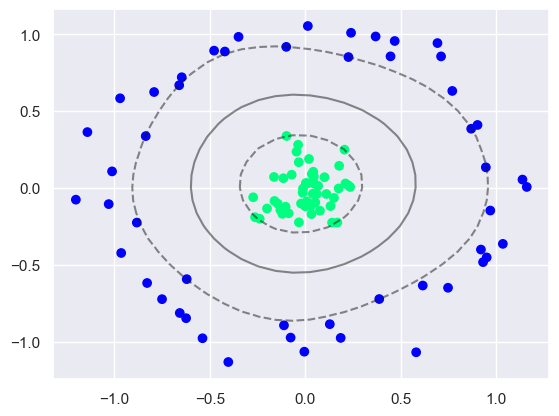

In [11]:
# Обучение ядерного SVM
clf = SVC(kernel='rbf', C=1e6).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plot_svc_decision_function(clf)

С помощью этого ядерного метода опорных векторов мы можем определить подходящую нелинейную границу решений. Такая методика ядерного преобразования
часто используется в машинном обучении для превращения быстрых линейных
методов в быстрые нелинейные.

### Размытие отступов

На этот случай в реализации метода SVM есть небольшой поправочный параметр
для «размытия» отступа. Данный параметр разрешает некоторым точкам «заходить» на отступ в тех случаях, когда это приводит к лучшей аппроксимации.
Степень размытости отступа управляется настроечным параметром, известным под
названием **C**. При очень большом значении параметра **C** отступ является «жестким»
и точки не могут находиться на нем. При меньшем значении параметра **C**| отступ
становится более размытым и может включать в себя некоторые точки.


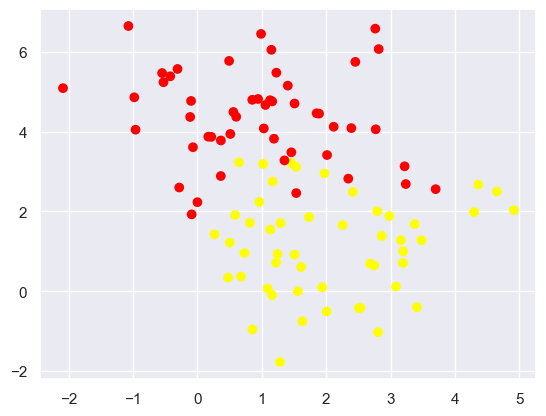

In [12]:
X, y = make_blobs(100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

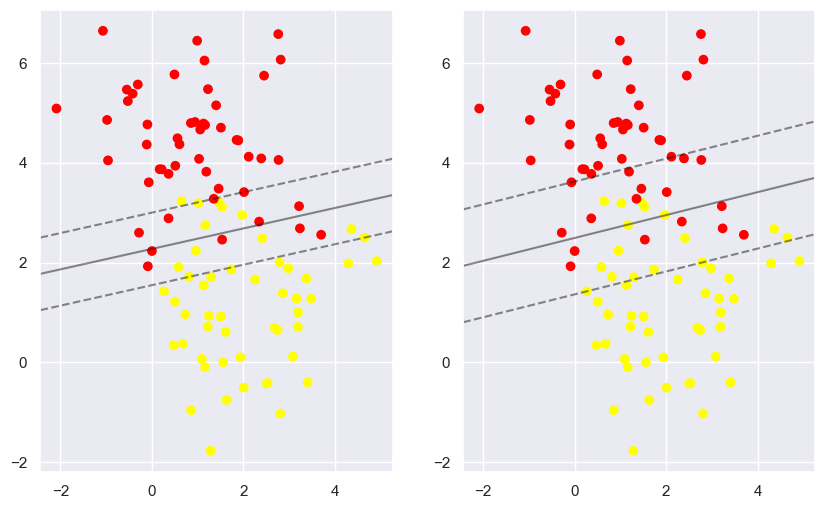

In [13]:
# влияние параметра С на аппроксимацию SVM

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

clf_10 = SVC(kernel='linear', C=10.0).fit(X, y)
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plot_svc_decision_function(clf_10, ax[0])

clf_01 = SVC(kernel='linear', C=0.1).fit(X, y)
ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plot_svc_decision_function(clf_01, ax[1])

### Резюме по методу опорных векторов

Методы SVM являются мощными методами классификации по ряду причин:
- Зависимость их от относительно небольшого количества опорных векторов означает компактность модели и небольшое количество используемой оперативной памяти.
- Фаза предсказания после обучения модели занимает очень мало времени.
- Поскольку на работу этих методов влияют только точки, находящиеся возле отступа, они хорошо подходят для многомерных данных — даже данных с количеством измерений большим, чем количество выборок, — непростые условия работы для других алгоритмов.
- Интеграция с ядерными методами делает их универсальными, обеспечивает приспособляемость к множеству типов данных. 

Однако у методов опорных векторов есть и несколько недостатков:
- Они масштабируются при количестве выборок N в наихудшем случае как O[$N^3$] (O[$N^2$] для более эффективных реализаций). При значительном количестве обучающих выборок вычислительные затраты могут оказаться непомерно высокими.
- Результаты зависят от удачности выбора параметра размытия C. Его необходимо тщательно выбирать с помощью перекрестной проверки, которая тоже может потребовать значительных вычислительных затрат при росте размеров наборов данных.
- У результатов отсутствует непосредственная вероятностная интерпретация. Ее можно получить путем внутренней перекрестной проверки (параметр probability оценивателя SVC), но эта дополнительная оценка обходится недешево в смысле вычислительных затрат.